<a href="https://colab.research.google.com/github/alshubati99/Data-Science-Study/blob/main/Nearest_Neighbor_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN, Nearest Neighbor Classifier
- KNN basic idea is that if the animal walks and quacks like a duck then it is a duck.
- **Nearsest Neighbor Classification:** <br>
  1. Requires three things
    a. Set of labeled records.
    b. Distance Metric to compute distance between records.
    c. The value of k, the number of nearest neighbors to retrieve.
  2. To classify unknown record:
    a. Compute distance to other training records.
    b. Identify k nearest neighbors.
    c. Use class labels of nearest neighbors to detemine the class label of unknown record (by taking majority vote for example)\
  3. KNN of a record x are data points that have the k smallest distance to x
  4. Euclidean Distance = Computes distance between two points.
  5. Take majority vote of class labels among take the kNN
  6. Weigh vote according to distance (factor = 1/d^2)
  7. Choose value of k:
    a. If k is too small, sensitive to noise points.
    b. If k is too large, neighborhood may include points from other classes.
  8. Scaling Issues:
    a. Attributes may have to be scaled to prevent distance measures from being dominated by one of the attributes
    => example: height, weight, income of persons that may vary in ranges.
  9. KNN classifiers are lazy learners since they do not build models explicitly.
  10. Classifying unknown records is relatively expensive
  11. KNN classifiers can produce arbitrarily shaped decision boundries.
  12. Selection of right proximity measure is essential
  13. Superfluous or redundant attributes can create problems.
  14. Missing attributes are hard to handle.

- **Choosing the Value of K:** <br>
  1. Cross-validation is a widely used approach. The error rate is estimated by keeping a subset of the training set out of the model training.
  2. 10-fold cross-validation involves random division of the training set into 10 equal-sized groups. 9 groups are used as the training set and the remaining group is used to obtain the performance score.
  3. This procedure is repeated 10 times and average performance scores are reported. The k value providing the highest score is utilized during testing.

- **Normalization of Variables:** <br>
  1. Zero mean unit-variance normalization: Xs = (X-mean)/s.d. => (x-mean)/(max-min)
  2. Max-min normalization: Xs = (X-min)/(max-min)

- **Distance Metrics:** <br>
  1. *Minowski metric*: general class of metrics
  2. *Eculidean metric*: represented as ||.|| (norm)
  3. *Manhattan metric*: which is the distance.

- **Improving KNN Efficiency:**
  1. Avoid having to compute distance to all objects in the training set.
  2. *Condensing*: determine a small set of objects that give the same performance.
    a. Condensed NN rule: CNN discards samples which can be correctly labeled using already selected subset of samples.
  3. *Editing*: remove objects to improve efficiency

- **K-Nearest Centriod Neighbor:** <br>
  1. NCN of a sample x is computed in an iterative manner as follows:
    a. First neighbor of x denoted by x1 is its nearest neighbor.
    b. For i>1, the ith neighbor, xi is the sample for which the mean of {x1,x2, ... ,xi} is closest to x
    c. K-NCN is defined as voting over the class labels of NCN or size k. As a measure of distance, Eculidean distance is generally used.
  
- **Nearest Feature Line Approach:** <br>
  1. In the NFL method, each pair of samples belonging to the same class is generalized by a line named as FL passing through them: **p** = xa + t(xb-xa)
  2. The label of a test sample is computed by projecting it into all FL and calculating the distance between the projection and the sample: **t** = ((x-xa).(xb-xa))/(||xb-xa||^2)
  3. The projection point on Line is computed as: p= xa+t(xb-xa) and **t** is the position parameter.
  4. The distance to Line is defined as: d= ||x-p||
  5. Having computed the distance to all FLs, the class to which the closest FL belongs is selected as the most likely class.

- **Nearest Neighbor Line Approach:** <br>
  1. In NNL Approach, instead of computing all possible FLs for each class, the FL passing through the closest pair of points is considered.
  2. During testing, the number of FLs considered is equal to the number of classes.
  3. in k-NNL approach, for each class, k-nearest samples to the test sample are computed. then the distances of the test sample to the FLs obtained using k-nearest samples from each class [totally(k*(k-1)/2)] are computed. The class label of the closest FL is selected as the class label of the tested sample.

- **Center Nearest Neighbor (CNN) Approach**: <br>
  1. Instead of defining FLs passing through every pair of samples  belonging to the same class, an FL is defined through every sample and the class's mean vector.
  2. During testing, the distances of the test sample to its projection on all FLs are obtained. Having computed the distances to all FLs, the class to which the closest FL belongs is selected as the most likely class.
  3. In k-CNN, the distances of the test sample to its projection on all FLs are obtained. Then voting is applied on the class labels of the k closest FL to choose the most likely class.

- Feature lines has downbacks which are interpolation and extraploation inaccuracies.


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
iris = sns.load_dataset("iris")
X=iris.drop('species',axis=1) # feature matrix
y=iris['species'] #1 represents positive case

In [3]:
# split data
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

clf = KNeighborsClassifier()
param_grid = {'n_neighbors': [1,3,5,7,9,11,13]}
search = GridSearchCV(estimator = clf, param_grid = param_grid, cv=5,
                      scoring = 'accuracy',
                      return_train_score=False,
                      verbose=1)
clf = search.fit(x_train, y_train)
print(clf.best_params_)
print("Best Cross Validation Accuracy Score")
print(clf.best_score_*100)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
{'n_neighbors': 11}
Best Cross Validation Accuracy Score
97.5


In [6]:
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9666666666666667


[Text(0, 0.5, 'Setosa'), Text(0, 1.5, 'Virginica'), Text(0, 2.5, 'Versicolor')]

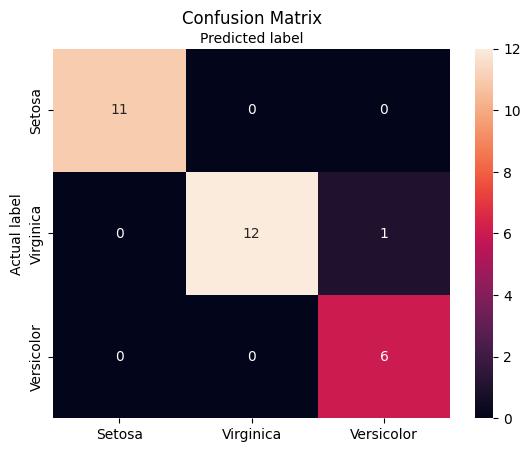

In [7]:
confMatrix = confusion_matrix(y_test, y_pred)
# create heatmap
ax = sns.heatmap(pd.DataFrame(confMatrix), annot = True, fmt = 'g')
ax.xaxis.set_label_position("top")
plt.title("Confusion Matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
ax.xaxis.set_ticklabels(['Setosa','Virginica','Versicolor'])
ax.yaxis.set_ticklabels(['Setosa','Virginica','Versicolor'])